# Proyecto 1 - Colorización de imágenes con autoencoders

**Nombre:** Xander Gallegos Velica

**Expediente:** 737989

**Fecha de entrega:** 01 de marzo de 2024

**Materia:** Aprendizaje Profundo.

**Repositorio de Github:** https://github.com/xagallegos/Image-Colorization

## Objetivos
+ Comprender los principios fundamentales de los autoencoders y su aplicación en deep learning generativo.
+ Implementar un autoencoder básico y variacionales para una tarea específica, como reducción de dimensión, denoising o generación de imágenes.
+ Analizar el rendimiento y las características de las representaciones aprendidas por los autoencoders.

## Introducción
Este proyecto se centra en la implementación de técnicas de aprendizaje profundo, específicamente con el uso de autoencoders, para abordar el problema de la colorización de imágenes. Los autoencoders son una clase de modelos de redes neuronales que han demostrado su eficacia en la representación y generación de datos complejos. Al emplear arquitecturas de autoencoders convolucionales, buscamos capturar y aprender las características intrínsecas de las imágenes en blanco y negro, para posteriormente generar versiones colorizadas de las mismas.

El objetivo principal de este proyecto es desarrollar un modelo de autoencoder capaz de aprender representaciones latentes significativas de imágenes en escala de grises y utilizar esta información para generar versiones colorizadas de alta calidad.

## Arquitectura

+ Input shape: $(128,128,1)$

### Encoder

| Tipo de Capa | Filtros | Tamaño del Kernel | Stride | Activación |
|--------------|---------|-------------------|--------|------------|
| Input        | -       | -                 | -      | -          |
| Conv2D       | 32      | 3x3               | 2      | ReLU       |
| Conv2D       | 64      | 3x3               | 2      | ReLU       |
| Conv2D       | 128     | 3x3               | 2      | ReLU       |
| Conv2D       | 256     | 3x3               | 2      | ReLU       |
| Flatten      | -       | -                 | -      | -          |
| Dense        | 256     | -                 | -      | -          |

### Decoder

| Tipo de Capa       | Filtros | Tamaño del Kernel | Stride | Activación |
|--------------------|---------|-------------------|--------|------------|
| Input              | -       | -                 | -      | -          |
| Dense              | 16 384  | -                 | -      | -          |
| Reshape            | -       | -                 | -      | -          |
| Conv2DTranspose    | 256     | 3x3               | 2      | ReLU       |
| Conv2DTranspose    | 128     | 3x3               | 2      | ReLU       |
| Conv2DTranspose    | 64      | 3x3               | 2      | ReLU       |
| Conv2DTranspose    | 32      | 3x3               | 2      | ReLU       |
| Conv2DTranspose    | 3       | 3x3               | -      | Sigmoid    |

## Modelos

Se entrenaron dos modelos utilizando la arquitectura convolucional presentada. Ambos modelos fueron entrenados durante 30 épocas, sin embargo, se aplicaron funciones de pérdida distintas durante el proceso de entrenamiento. El primer modelo se entrenó utilizando la función de pérdida Mean Squared Error (MSE).Mientras tanto, el segundo modelo se entrenó utilizando la función de pérdida Binary Crossentropy.

La elección de utilizar diferentes funciones de pérdida permitió explorar cómo el modelo respondía a la variación en los criterios de optimización. La aplicación de MSE en el primer modelo busca minimizar las diferencias cuadráticas en los valores de píxeles, favoreciendo la fidelidad en la reproducción del color. Por otro lado, la utilización de Binary Crossentropy en el segundo modelo se centra en la similitud de distribuciones, destacando la importancia de la relación de color en términos de presencia o ausencia. Esta estrategia de entrenamiento diversificado proporciona una comprensión más completa de cómo el autoencoder puede adaptarse y aprender representaciones latentes de las imágenes en blanco y negro para producir resultados colorizados.

## Test

In [1]:
import colorizarization_autoencoder
import matplotlib.pyplot as plt
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
test_path = "archive/val_256/test_samples"

test_dataset = colorizarization_autoencoder.create_dataset(test_path, batch=1)

Found 7302 files belonging to 1 classes.
Found 7302 files belonging to 1 classes.


In [3]:
model_1 = colorizarization_autoencoder.create_model()
model_1.load_weights("models/training_1/cp.ckpt")

model_2 = colorizarization_autoencoder.create_model()
model_2.load_weights("models/training_2/cp.ckpt")

In [4]:
model_1.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
model_1.evaluate(test_dataset, batch_size=1)
model_2.evaluate(test_dataset, batch_size=1)

7302/7302 [==============================] - 141s 19ms/step - loss: 0.5605 - accuracy: 0.4403


[0.5605048537254333, 0.4402787983417511]

In [5]:
test_iterator = iter(test_dataset)

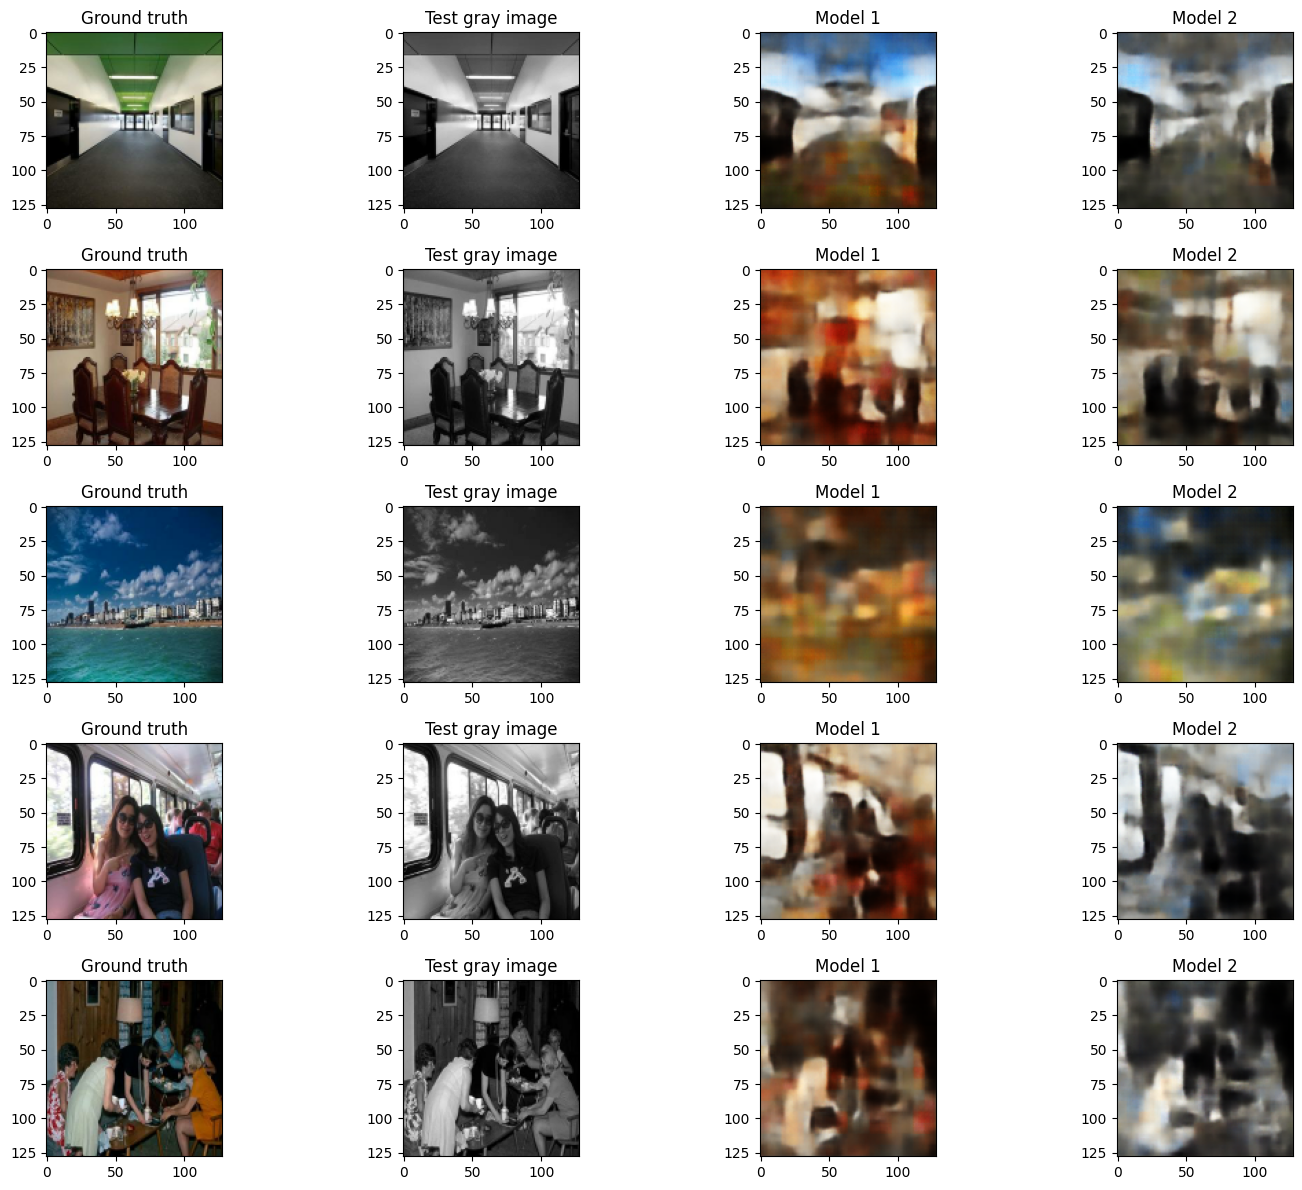

In [6]:
n = 5

_, axes = plt.subplots(nrows=n, ncols=4, figsize=(15,12))

for i in range(n):
    test_batch = next(test_iterator)

    axes[i][0].imshow(tf.keras.utils.array_to_img(test_batch[1][0]))
    axes[i][0].set_title('Ground truth')

    axes[i][1].imshow(tf.keras.utils.array_to_img(test_batch[0][0]), cmap='gray')
    axes[i][1].set_title('Test gray image')

    axes[i][2].imshow(tf.keras.utils.array_to_img(model_1.predict(test_batch[0], verbose=0)[0]))
    axes[i][2].set_title('Model 1')

    axes[i][3].imshow(tf.keras.utils.array_to_img(model_2.predict(test_batch[0], verbose=0)[0]))
    axes[i][3].set_title('Model 2')

plt.tight_layout()
plt.show()

## Conclusión

En conclusión, a pesar de la necesidad de un entrenamiento adicional para perfeccionar las predicciones, los autoencoders empleados en este proyecto han demostrado resultados prometedores al lograr la colorización de imágenes, destacando su potencial para mejorar y enriquecer la calidad visual de las mismas.